In [855]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np       
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

# Часть 1. Сбор данных

## Здесь происходил парсинг:

In [384]:
urll = []
for i in range (2014,2017):
    url = 'https://www.numbeo.com/quality-of-life/rankings_by_country.jsp?title='+str(i)
    urll.append(url)
urll

['https://www.numbeo.com/quality-of-life/rankings_by_country.jsp?title=2014',
 'https://www.numbeo.com/quality-of-life/rankings_by_country.jsp?title=2015',
 'https://www.numbeo.com/quality-of-life/rankings_by_country.jsp?title=2016']

In [385]:
from fake_useragent import UserAgent
UserAgent().chrome

'Mozilla/5.0 (X11; U; Linux i686; en-US) AppleWebKit/534.12 (KHTML, like Gecko) Chrome/9.0.579.0 Safari/534.12'

In [386]:
w = []
for i in urll:
    response = requests.get(i, headers={'User-Agent': UserAgent().chrome})
    tree = BeautifulSoup(response.text, 'html.parser')
    d = {}
    d["COUNTRY"] = tree.find_all('td',{"class":"cityOrCountryInIndicesTable"})
    d['Q_OF_LIFE'] = tree.find_all('td',{"style":"text-align: right"})[::9]
    d['POLLUTION'] = (tree.find_all('td',{"style":"text-align: right"})[7:])[::9]
    d['PRICE_TO_INCOME_RATIO'] = (tree.find_all('td',{"style":"text-align: right"})[5:])[::9]
    w.append(d)

In [387]:
p = pd.DataFrame(w)
p

,COUNTRY,Q_OF_LIFE,POLLUTION,PRICE_TO_INCOME_RATIO
0,"[[Switzerland], [United States], [Germany], [S...","[[206.2], [195.5], [192.7], [180.9], [178.9], ...","[[26.8], [35.1], [30.2], [17.5], [16.7], [34.8...","[[7.1], [2.4], [5.6], [9.4], [7.8], [6.4], [5...."
1,"[[Switzerland], [Germany], [Sweden], [United S...","[[222.9], [195.9], [193.9], [192.5], [190.2], ...","[[24.1], [28.3], [15.1], [31.4], [14.9], [31.8...","[[7.3], [6.6], [9.2], [2.6], [7.0], [5.0], [9...."
2,"[[Switzerland], [Denmark], [New Zealand], [Ger...","[[208.5], [206.5], [201.1], [199.7], [198.8], ...","[[23.0], [29.9], [19.0], [29.9], [22.9], [30.8...","[[8.6], [5.9], [6.3], [7.1], [8.4], [9.5], [5...."


In [388]:
q = p['COUNTRY'][0]
pars1 = pd.DataFrame(q, columns = ['COUNTRY'])
pars1['Q_OF_LIFE'] = pd.DataFrame(p['Q_OF_LIFE'][0])
pars1['POLLUTION'] = pd.DataFrame(p['POLLUTION'][0])
pars1['PRICE_TO_INCOME_RATIO'] = pd.DataFrame(p['PRICE_TO_INCOME_RATIO'][0])
pars1['YEAR'] = 2014

q = p['COUNTRY'][1]
pars2 = pd.DataFrame(q, columns = ['COUNTRY'])
pars2['Q_OF_LIFE'] = pd.DataFrame(p['Q_OF_LIFE'][1])
pars2['POLLUTION'] = pd.DataFrame(p['POLLUTION'][1])
pars2['PRICE_TO_INCOME_RATIO'] = pd.DataFrame(p['PRICE_TO_INCOME_RATIO'][1])
pars2['YEAR'] = 2015

q = p['COUNTRY'][2]
pars3 = pd.DataFrame(q, columns = ['COUNTRY'])
pars3['Q_OF_LIFE'] = pd.DataFrame(p['Q_OF_LIFE'][2])
pars3['POLLUTION'] = pd.DataFrame(p['POLLUTION'][2])
pars3['PRICE_TO_INCOME_RATIO'] = pd.DataFrame(p['PRICE_TO_INCOME_RATIO'][2])
pars3['YEAR'] = 2016

o = pd.concat([pars1, pars2,pars3])
o.head()

,COUNTRY,Q_OF_LIFE,POLLUTION,PRICE_TO_INCOME_RATIO,YEAR
0,Switzerland,206.2,26.8,7.1,2014
1,United States,195.5,35.1,2.4,2014
2,Germany,192.7,30.2,5.6,2014
3,Sweden,180.9,17.5,9.4,2014
4,Finland,178.9,16.7,7.8,2014


In [389]:
ur = []
for i in range(2012,2014):
    urlll = 'https://www.numbeo.com/quality-of-life/rankings_by_country.jsp?title='+str(i)+'-Q1'
    ur.append(urlll)
ur

['https://www.numbeo.com/quality-of-life/rankings_by_country.jsp?title=2012-Q1',
 'https://www.numbeo.com/quality-of-life/rankings_by_country.jsp?title=2013-Q1']

In [390]:
w1 = []
for i in ur:
    response = requests.get(i, headers={'User-Agent': UserAgent().chrome})
    tree = BeautifulSoup(response.text, 'html.parser')
    d = {}
    d["COUNTRY"] = tree.find_all('td',{"class":"cityOrCountryInIndicesTable"})
    d['Q_OF_LIFE'] = tree.find_all('td',{"style":"text-align: right"})[::9]
    d['POLLUTION'] = (tree.find_all('td',{"style":"text-align: right"})[7:])[::9]
    d['PRICE_TO_INCOME_RATIO'] = (tree.find_all('td',{"style":"text-align: right"})[5:])[::9]
    w1.append(d)

In [391]:
p1 = pd.DataFrame(w1)
p1

,COUNTRY,Q_OF_LIFE,POLLUTION,PRICE_TO_INCOME_RATIO
0,"[[Switzerland], [Germany], [Norway], [United A...","[[194.1], [184.4], [183.4], [177.1], [174.3], ...","[[35.5], [45.1], [19.2], [69.2], [17.1], [32.5...","[[6.5], [4.8], [7.1], [4.5], [5.7], [9.0], [4...."
1,"[[Switzerland], [Germany], [United States], [S...","[[215.7], [204.8], [199.6], [191.4], [186.0], ...","[[23.0], [28.4], [32.5], [18.8], [26.5], [58.4...","[[6.2], [5.0], [2.2], [8.8], [5.1], [4.4], [7...."


In [392]:
q = p1['COUNTRY'][0]
pars1 = pd.DataFrame(q, columns = ['COUNTRY'])
pars1['Q_OF_LIFE'] = pd.DataFrame(p1['Q_OF_LIFE'][0])
pars1['POLLUTION'] = pd.DataFrame(p1['POLLUTION'][0])
pars1['PRICE_TO_INCOME_RATIO'] = pd.DataFrame(p1['PRICE_TO_INCOME_RATIO'][0])
pars1['YEAR'] = 2012

q = p1['COUNTRY'][1]
pars2 = pd.DataFrame(q, columns = ['COUNTRY'])
pars2['Q_OF_LIFE'] = pd.DataFrame(p1['Q_OF_LIFE'][1])
pars2['POLLUTION'] = pd.DataFrame(p1['POLLUTION'][1])
pars2['PRICE_TO_INCOME_RATIO'] = pd.DataFrame(p1['PRICE_TO_INCOME_RATIO'][1])
pars2['YEAR'] = 2013

o1 = pd.concat([pars1, pars2,o])
o1.set_index('COUNTRY', inplace=True)
o1.head()

,Q_OF_LIFE,POLLUTION,PRICE_TO_INCOME_RATIO,YEAR
COUNTRY,,,,
Switzerland,194.1,35.5,6.5,2012
Germany,184.4,45.1,4.8,2012
Norway,183.4,19.2,7.1,2012
United Arab Emirates,177.1,69.2,4.5,2012
New Zealand,174.3,17.1,5.7,2012


In [393]:
urll1 = []
for i in range (2014,2017):
    url = 'https://www.numbeo.com/crime/rankings_by_country.jsp?title='+str(i)
    urll1.append(url)
urll1

['https://www.numbeo.com/crime/rankings_by_country.jsp?title=2014',
 'https://www.numbeo.com/crime/rankings_by_country.jsp?title=2015',
 'https://www.numbeo.com/crime/rankings_by_country.jsp?title=2016']

In [394]:
w2 = []
for i in urll1:
    response1 = requests.get(i, headers={'User-Agent': UserAgent().chrome})
    tree1 = BeautifulSoup(response1.text, 'html.parser')
    d1 = {}
    d1["COUNTRY"] = tree1.find_all('td',{"class":"cityOrCountryInIndicesTable"})
    d1['CRIME'] = tree1.find_all('td',{"style":"text-align: right"})[::2]
    w2.append(d1)

In [395]:
p2 = pd.DataFrame(w2)
p2

,COUNTRY,CRIME
0,"[[Afghanistan], [Venezuela], [Guatemala], [Ken...","[[82.5], [81.5], [79.3], [78.9], [78.7], [78.5..."
1,"[[South Sudan], [Venezuela], [Guatemala], [Sou...","[[85.3], [84.1], [79.3], [78.4], [77.3], [76.9..."
2,"[[Venezuela], [South Sudan], [South Africa], [...","[[84.4], [81.3], [78.4], [77.6], [76.4], [74.1..."


In [396]:
q = p2['COUNTRY'][0]
pars1 = pd.DataFrame(q, columns = ['COUNTRY'])
pars1['CRIME'] = pd.DataFrame(p2['CRIME'][0])
pars1['YEAR'] = 2014

q = p2['COUNTRY'][1]
pars2 = pd.DataFrame(q, columns = ['COUNTRY'])
pars2['CRIME'] = pd.DataFrame(p2['CRIME'][1])
pars2['YEAR'] = 2015

q = p2['COUNTRY'][2]
pars3 = pd.DataFrame(q, columns = ['COUNTRY'])
pars3['CRIME'] = pd.DataFrame(p2['CRIME'][2])
pars3['YEAR'] = 2016

o2 = pd.concat([pars1, pars2,pars3])
o2.head()

,COUNTRY,CRIME,YEAR
0,Afghanistan,82.5,2014
1,Venezuela,81.5,2014
2,Guatemala,79.3,2014
3,Kenya,78.9,2014
4,Trinidad And Tobago,78.7,2014


In [397]:
urll1 = []
for i in range (2012,2014):
    url = 'https://www.numbeo.com/crime/rankings_by_country.jsp?title='+str(i)+'-Q1'
    urll1.append(url)
urll1

['https://www.numbeo.com/crime/rankings_by_country.jsp?title=2012-Q1',
 'https://www.numbeo.com/crime/rankings_by_country.jsp?title=2013-Q1']

In [398]:
w3 = []
for i in urll1:
    response1 = requests.get(i, headers={'User-Agent': UserAgent().chrome})
    tree1 = BeautifulSoup(response1.text, 'html.parser')
    d1 = {}
    d1["COUNTRY"] = tree1.find_all('td',{"class":"cityOrCountryInIndicesTable"})
    d1['CRIME'] = tree1.find_all('td',{"style":"text-align: right"})[::2]
    w3.append(d1)

In [399]:
p3 = pd.DataFrame(w3)
p3

,COUNTRY,CRIME
0,"[[Venezuela], [South Africa], [Puerto Rico], [...","[[84.7], [78.1], [73.1], [70.9], [64.9], [64.8..."
1,"[[Venezuela], [Guatemala], [Trinidad And Tobag...","[[85.7], [84.9], [83.6], [76.7], [74.3], [73.0..."


In [400]:
q = p3['COUNTRY'][0]
pars1 = pd.DataFrame(q, columns = ['COUNTRY'])
pars1['CRIME'] = pd.DataFrame(p3['CRIME'][0])
pars1['YEAR'] = 2012

q = p3['COUNTRY'][1]
pars2 = pd.DataFrame(q, columns = ['COUNTRY'])
pars2['CRIME'] = pd.DataFrame(p3['CRIME'][1])
pars2['YEAR'] = 2013

o3 = pd.concat([pars1, pars2,o2])
o3.set_index('COUNTRY', inplace = True)
o3.head()

,CRIME,YEAR
COUNTRY,,
Venezuela,84.7,2012
South Africa,78.1,2012
Puerto Rico,73.1,2012
Malaysia,70.9,2012
United States,64.9,2012


In [402]:
parss1 = o1.merge(o3, how = 'left', on = ['COUNTRY', 'YEAR'])
print(parss1.shape)
parss1.head()

(328, 5)


,Q_OF_LIFE,POLLUTION,PRICE_TO_INCOME_RATIO,YEAR,CRIME
COUNTRY,,,,,
Switzerland,194.1,35.5,6.5,2012,25.8
Germany,184.4,45.1,4.8,2012,21.2
Norway,183.4,19.2,7.1,2012,19.1
United Arab Emirates,177.1,69.2,4.5,2012,35.9
New Zealand,174.3,17.1,5.7,2012,46.8


## Смешиваю с другими датафреймами:

In [403]:
os.chdir('C:\\Users\\Nvero\\OneDrive\\MSM')

In [418]:
df1 = pd.read_csv('m.csv') #этот я составляла вручную(*вьетнамские флешбеки*) и отправяла 12 апреля 
df2 = pd.read_csv('gdp.csv') # остальные взяты здесь: https://www.kaggle.com/datasets/zgrcemta/world-gdpgdp-gdp-per-capita-and-annual-growths
df3 = pd.read_csv('gdp_per_capita.csv') 

In [419]:
df1 = df1.drop(['Healthy life expectancy', 'Freedom to make life choices','Generosity'], axis= 1)
print(df1.shape)
df1.head()

(351, 9)


,COUNTRY,YEAR_x,GDP,GDP_PER_CAP,Q_OF_LIFE,TAX,PRICE_TO_INCOME_RATIO,POLLUTION,CRIME
0,Argentina,2017,6.436290e+11,14613.0,"139,6",progressive,"12,1","53,3","62,6"
1,Australia,2017,1.326880e+12,53934.0,"176,5",progressive,"9,2","24,6","42,4"
2,Austria,2017,4.172610e+11,47429.0,"190,4",progressive,"9,7","21,9","19,2"
3,Belarus,2017,5.472660e+10,5786.0,"119,2",proportional,"18,7","39,6","22,3"
4,Belgium,2017,5.027650e+11,44198.0,"160,5",progressive,7,"48,9","44,5"


In [422]:
a = df2[['Country Name','2012']]
a['YEAR'] = 2012
a.rename(columns={'Country Name':'COUNTRY','2012':'GDP'}, inplace = True)
a.head()

C:\Users\Nvero\AppData\Local\Temp\ipykernel_3068\4288682865.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a['YEAR'] = 2012
C:\Users\Nvero\AppData\Local\Temp\ipykernel_3068\4288682865.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a.rename(columns={'Country Name':'COUNTRY','2012':'GDP'}, inplace = True)


,COUNTRY,GDP,YEAR
0,Aruba,2.534637e+09,2012
1,Africa Eastern and Southern,9.505214e+11,2012
2,Afghanistan,1.990732e+10,2012
3,Africa Western and Central,7.275714e+11,2012
4,Angola,1.280529e+11,2012


In [423]:
b = df2[['Country Name','2013']]
b['YEAR'] = 2013
b.rename(columns={'Country Name':'COUNTRY','2013':'GDP'}, inplace = True)
b.head()

C:\Users\Nvero\AppData\Local\Temp\ipykernel_3068\2828032382.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  b['YEAR'] = 2013
C:\Users\Nvero\AppData\Local\Temp\ipykernel_3068\2828032382.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  b.rename(columns={'Country Name':'COUNTRY','2013':'GDP'}, inplace = True)


,COUNTRY,GDP,YEAR
0,Aruba,2.727850e+09,2013
1,Africa Eastern and Southern,9.642424e+11,2013
2,Afghanistan,2.014640e+10,2013
3,Africa Western and Central,8.207876e+11,2013
4,Angola,1.367099e+11,2013


In [424]:
c = df2[['Country Name','2014']]
c['YEAR'] = 2014
c.rename(columns={'Country Name':'COUNTRY','2014':'GDP'}, inplace = True)
c.head()

C:\Users\Nvero\AppData\Local\Temp\ipykernel_3068\690194854.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  c['YEAR'] = 2014
C:\Users\Nvero\AppData\Local\Temp\ipykernel_3068\690194854.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  c.rename(columns={'Country Name':'COUNTRY','2014':'GDP'}, inplace = True)


,COUNTRY,GDP,YEAR
0,Aruba,2.790849e+09,2014
1,Africa Eastern and Southern,9.848071e+11,2014
2,Afghanistan,2.049713e+10,2014
3,Africa Western and Central,8.649666e+11,2014
4,Angola,1.457122e+11,2014


In [425]:
d = df2[['Country Name','2015']]
d['YEAR'] = 2015
d.rename(columns={'Country Name':'COUNTRY','2015':'GDP'}, inplace = True)
d.head()

C:\Users\Nvero\AppData\Local\Temp\ipykernel_3068\291681815.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d['YEAR'] = 2015
C:\Users\Nvero\AppData\Local\Temp\ipykernel_3068\291681815.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d.rename(columns={'Country Name':'COUNTRY','2015':'GDP'}, inplace = True)


,COUNTRY,GDP,YEAR
0,Aruba,2.962905e+09,2015
1,Africa Eastern and Southern,9.199300e+11,2015
2,Afghanistan,1.913421e+10,2015
3,Africa Western and Central,7.607297e+11,2015
4,Angola,1.161936e+11,2015


In [426]:
e = df2[['Country Name','2016']]
e['YEAR'] = 2016
e.rename(columns={'Country Name':'COUNTRY','2016':'GDP'}, inplace = True)
e.head()

C:\Users\Nvero\AppData\Local\Temp\ipykernel_3068\2716227682.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  e['YEAR'] = 2016
C:\Users\Nvero\AppData\Local\Temp\ipykernel_3068\2716227682.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  e.rename(columns={'Country Name':'COUNTRY','2016':'GDP'}, inplace = True)


,COUNTRY,GDP,YEAR
0,Aruba,2.983637e+09,2016
1,Africa Eastern and Southern,8.733549e+11,2016
2,Afghanistan,1.811656e+10,2016
3,Africa Western and Central,6.905430e+11,2016
4,Angola,1.011239e+11,2016


In [427]:
parsy = pd.concat([a,b,c,d,e])
print(parsy.shape)
parsy.head()

(1330, 3)


,COUNTRY,GDP,YEAR
0,Aruba,2.534637e+09,2012
1,Africa Eastern and Southern,9.505214e+11,2012
2,Afghanistan,1.990732e+10,2012
3,Africa Western and Central,7.275714e+11,2012
4,Angola,1.280529e+11,2012


In [428]:
parss2 = parss1.merge(parsy, how = 'left', on = ['COUNTRY', 'YEAR'])
print(parss2.shape)
parss2.head()

(328, 7)


,COUNTRY,Q_OF_LIFE,POLLUTION,PRICE_TO_INCOME_RATIO,YEAR,CRIME,GDP
0,Switzerland,194.1,35.5,6.5,2012,25.8,6.921097e+11
1,Germany,184.4,45.1,4.8,2012,21.2,3.527345e+12
2,Norway,183.4,19.2,7.1,2012,19.1,5.095063e+11
3,United Arab Emirates,177.1,69.2,4.5,2012,35.9,3.745906e+11
4,New Zealand,174.3,17.1,5.7,2012,46.8,1.762067e+11


In [429]:
a = df3[['Country Name','2012']]
a['YEAR'] = 2012
a.rename(columns={'Country Name':'COUNTRY','2012':'GDP_PER_CAP'}, inplace = True)
b = df3[['Country Name','2013']]
b['YEAR'] = 2013
b.rename(columns={'Country Name':'COUNTRY','2013':'GDP_PER_CAP'}, inplace = True)
c = df3[['Country Name','2014']]
c['YEAR'] = 2014
c.rename(columns={'Country Name':'COUNTRY','2014':'GDP_PER_CAP'}, inplace = True)
d = df3[['Country Name','2015']]
d['YEAR'] = 2015
d.rename(columns={'Country Name':'COUNTRY','2015':'GDP_PER_CAP'}, inplace = True)
e = df3[['Country Name','2016']]
e['YEAR'] = 2016
e.rename(columns={'Country Name':'COUNTRY','2016':'GDP_PER_CAP'}, inplace = True)
parsy_2 = pd.concat([a,b,c,d,e])
parsy_2.head()

C:\Users\Nvero\AppData\Local\Temp\ipykernel_3068\662536483.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a['YEAR'] = 2012
C:\Users\Nvero\AppData\Local\Temp\ipykernel_3068\662536483.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a.rename(columns={'Country Name':'COUNTRY','2012':'GDP_PER_CAP'}, inplace = True)
C:\Users\Nvero\AppData\Local\Temp\ipykernel_3068\662536483.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentati

,COUNTRY,GDP_PER_CAP,YEAR
0,Aruba,24712.493263,2012
1,Africa Eastern and Southern,1736.166560,2012
2,Afghanistan,638.845852,2012
3,Africa Western and Central,1965.118485,2012
4,Angola,5100.097027,2012


In [430]:
parss3 = parss2.merge(parsy_2, how = 'left', on = ['COUNTRY', 'YEAR'])
parss3['TAX'] ='progressive' #для удобства, в дальнейшем отредактировала в соответствии с действительностью
parss3.head()

,COUNTRY,Q_OF_LIFE,POLLUTION,PRICE_TO_INCOME_RATIO,YEAR,CRIME,GDP,GDP_PER_CAP,TAX
0,Switzerland,194.1,35.5,6.5,2012,25.8,6.921097e+11,86547.670891,progressive
1,Germany,184.4,45.1,4.8,2012,21.2,3.527345e+12,43858.363055,progressive
2,Norway,183.4,19.2,7.1,2012,19.1,5.095063e+11,101524.141852,progressive
3,United Arab Emirates,177.1,69.2,4.5,2012,35.9,3.745906e+11,40976.490746,progressive
4,New Zealand,174.3,17.1,5.7,2012,46.8,1.762067e+11,39973.380759,progressive


In [431]:
df1.rename(columns={'YEAR_x':'YEAR'}, inplace = True)
df1.head()

,COUNTRY,YEAR,GDP,GDP_PER_CAP,Q_OF_LIFE,TAX,PRICE_TO_INCOME_RATIO,POLLUTION,CRIME
0,Argentina,2017,6.436290e+11,14613.0,"139,6",progressive,"12,1","53,3","62,6"
1,Australia,2017,1.326880e+12,53934.0,"176,5",progressive,"9,2","24,6","42,4"
2,Austria,2017,4.172610e+11,47429.0,"190,4",progressive,"9,7","21,9","19,2"
3,Belarus,2017,5.472660e+10,5786.0,"119,2",proportional,"18,7","39,6","22,3"
4,Belgium,2017,5.027650e+11,44198.0,"160,5",progressive,7,"48,9","44,5"


In [432]:
itog = pd.concat([parss3, df1])
print(itog.shape)
itog.head()

(679, 9)


,COUNTRY,Q_OF_LIFE,POLLUTION,PRICE_TO_INCOME_RATIO,YEAR,CRIME,GDP,GDP_PER_CAP,TAX
0,Switzerland,194.1,35.5,6.5,2012,25.8,6.921097e+11,86547.670891,progressive
1,Germany,184.4,45.1,4.8,2012,21.2,3.527345e+12,43858.363055,progressive
2,Norway,183.4,19.2,7.1,2012,19.1,5.095063e+11,101524.141852,progressive
3,United Arab Emirates,177.1,69.2,4.5,2012,35.9,3.745906e+11,40976.490746,progressive
4,New Zealand,174.3,17.1,5.7,2012,46.8,1.762067e+11,39973.380759,progressive


In [331]:
#itog.to_csv('itog.csv')

## Итоговый датасет:

In [950]:
os.chdir('C:\\Users\\Nvero\\OneDrive\\MSM')
df = pd.read_csv('itog.csv', sep = ',')
print(df.shape)
df.head()

(679, 11)


,COUNTRY,Unnamed: 0,Q_OF_LIFE,POLLUTION,PRICE_TO_INCOME_RATIO,YEAR,CRIME,GDP,GDP_PER_CAP,TAX,Regional indicator
0,Switzerland,0,194.1,35.5,6.5,2012,25.8,6.921097e+11,86547.670891,progressive,Western Europe
1,Germany,1,184.4,45.1,4.8,2012,21.2,3.527345e+12,43858.363055,progressive,Western Europe
2,Norway,2,183.4,19.2,7.1,2012,19.1,5.095063e+11,101524.141852,progressive,Western Europe
3,United Arab Emirates,3,177.1,69.2,4.5,2012,35.9,3.745906e+11,40976.490746,proportional,Middle East and North Africa
4,New Zealand,4,174.3,17.1,5.7,2012,46.8,1.762067e+11,39973.380759,progressive,North America and ANZ


# Часть 2. Предварительная обработка

Описание переменных:

1)COUNTRY - название страны, по которой собраны данные
2)YEAR - год, в который были зафиксированы данные
3)Q_OF_LIFE - показатель качества жизни
4)POLLUTION - индекс загрязненности окружающей среды
5)PRICE_TO_INCOME_RATIO - индекс соотношения цен и доходов населения
6)CRIME - индекс уровня преступности в стране
7)GDP - ВВП государства
8)GDP_PER_CAP - ВВП на душу населения
9)TAX - система налогооблажения в стране(прогрессивная/пропорциональная)
10)Regional indicator - региональная принадлежность

Избавляемся от бесполезного столбца с номерами наблюдений:

In [951]:
df.drop('Unnamed: 0', axis=1,inplace=True)
df.head()

,COUNTRY,Q_OF_LIFE,POLLUTION,PRICE_TO_INCOME_RATIO,YEAR,CRIME,GDP,GDP_PER_CAP,TAX,Regional indicator
0,Switzerland,194.1,35.5,6.5,2012,25.8,6.921097e+11,86547.670891,progressive,Western Europe
1,Germany,184.4,45.1,4.8,2012,21.2,3.527345e+12,43858.363055,progressive,Western Europe
2,Norway,183.4,19.2,7.1,2012,19.1,5.095063e+11,101524.141852,progressive,Western Europe
3,United Arab Emirates,177.1,69.2,4.5,2012,35.9,3.745906e+11,40976.490746,proportional,Middle East and North Africa
4,New Zealand,174.3,17.1,5.7,2012,46.8,1.762067e+11,39973.380759,progressive,North America and ANZ


Обработка пропусков:

In [952]:
df.isnull().sum()

COUNTRY                  0
Q_OF_LIFE                0
POLLUTION                0
PRICE_TO_INCOME_RATIO    7
YEAR                     0
CRIME                    2
GDP                      7
GDP_PER_CAP              7
TAX                      0
Regional indicator       0
dtype: int64

In [953]:
df.dtypes

COUNTRY                   object
Q_OF_LIFE                 object
POLLUTION                 object
PRICE_TO_INCOME_RATIO     object
YEAR                       int64
CRIME                     object
GDP                      float64
GDP_PER_CAP              float64
TAX                       object
Regional indicator        object
dtype: object

4 столбца считываются как категориальные переменные, сделаю их числовыми:

In [954]:
df['CRIME'].fillna('0,0', inplace=True)
df['PRICE_TO_INCOME_RATIO'].fillna('0,0', inplace=True)

In [955]:
df['Q_OF_LIFE'] = df['Q_OF_LIFE'].apply(lambda x: float(x.replace(',','.').replace('"','')))
df['POLLUTION'] = df['POLLUTION'].apply(lambda x: float(x.replace(',','.').replace('"','')))
df['CRIME'] = df['CRIME'].apply(lambda x: float(x.replace(',','.').replace('"','')))
df['PRICE_TO_INCOME_RATIO'] = df['PRICE_TO_INCOME_RATIO'].apply(lambda x: float(x.replace(',','.').replace('"','')))


In [956]:
df.dtypes

COUNTRY                   object
Q_OF_LIFE                float64
POLLUTION                float64
PRICE_TO_INCOME_RATIO    float64
YEAR                       int64
CRIME                    float64
GDP                      float64
GDP_PER_CAP              float64
TAX                       object
Regional indicator        object
dtype: object

In [957]:
df.isnull().sum()

COUNTRY                  0
Q_OF_LIFE                0
POLLUTION                0
PRICE_TO_INCOME_RATIO    0
YEAR                     0
CRIME                    0
GDP                      7
GDP_PER_CAP              7
TAX                      0
Regional indicator       0
dtype: int64

!Для того, чтобы CRIME и PRICE_TO_INCOME_RATIO стали числовыми для работы функции пришлось заменить пропуски на нули!

Разделим датасет на трейн и тест и только после этого избавимся от пропусков. Это предотвратит "подглядывание" в тестовые данные в будущем при построении модели линейной регрессии:

Т.к. в датафрейме собраны совершенно разнообразные страны, там могут находиться как очень бедные государства с малым ВВП и ВВП на душу населения и высокими показателями преступности, так и богатые. Это говорит о том, что велика вероятность наличия выбросов. Лучше заполнить пропуски медианными значениями, которые не зависят от выбросов.

In [958]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns=['Q_OF_LIFE']), df['Q_OF_LIFE'], test_size=0.2, random_state=42)
X_train.columns = X_train.columns.astype(str)
X_test.columns = X_test.columns.astype(str)

#избавляемся от искусственно добавленных нулей:
X_train['CRIME'] = X_train['CRIME'].where(X_train['CRIME']!=0, X_train['CRIME'].median())
X_test['CRIME'] = X_test['CRIME'].where(X_test['CRIME']!=0, X_train['CRIME'].median())
X_train['PRICE_TO_INCOME_RATIO'] = X_train['PRICE_TO_INCOME_RATIO'].where(X_train['PRICE_TO_INCOME_RATIO']!=0, X_train['PRICE_TO_INCOME_RATIO'].median())
X_test['PRICE_TO_INCOME_RATIO'] = X_test['PRICE_TO_INCOME_RATIO'].where(X_test['PRICE_TO_INCOME_RATIO']!=0, X_train['PRICE_TO_INCOME_RATIO'].median())

#использован универсальный вариант кода
imputer = SimpleImputer(strategy='median')
numeric_cols = X_train.select_dtypes(include=['number']).columns.tolist()
X_train[numeric_cols] = imputer.fit_transform(X_train[numeric_cols])
X_test[numeric_cols] = imputer.transform(X_test[numeric_cols])

X_train_cat = X_train[categorical_cols]
X_test_cat = X_test[categorical_cols]

missing_cols = set(X_train_cat.columns) - set(X_test_cat.columns)
for c in missing_cols:
    X_test_cat[c] = 0
X_test_cat = X_test_cat.reindex(columns=X_train_cat.columns, fill_value=0)


X_train_processed = pd.concat([X_train[numeric_cols], X_train_cat], axis=1)
X_test_processed = pd.concat([X_test[numeric_cols], X_test_cat], axis=1)
X_train_processed.isnull().sum()

POLLUTION                0
PRICE_TO_INCOME_RATIO    0
YEAR                     0
CRIME                    0
GDP                      0
GDP_PER_CAP              0
TAX                      0
Regional indicator       0
COUNTRY                  0
dtype: int64

In [959]:
X_test_processed.isnull().sum()

POLLUTION                0
PRICE_TO_INCOME_RATIO    0
YEAR                     0
CRIME                    0
GDP                      0
GDP_PER_CAP              0
TAX                      0
Regional indicator       0
COUNTRY                  0
dtype: int64

# Часть 3. Визуализация

Для выполнения всех графиков будет использован X_train_processed и y_train. Первым делом посмотрим на гистограммы распределений числовых признаков:

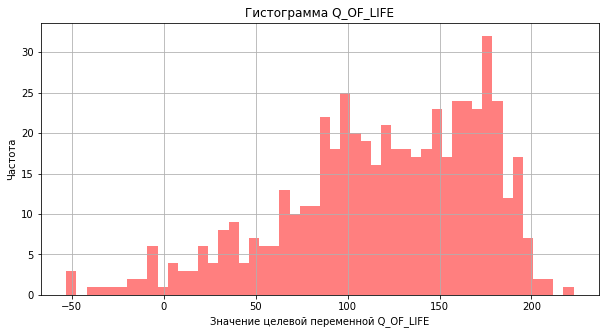

In [960]:
plt.figure(figsize = (10,5))

y_train.hist(bins=50, color='red', alpha=0.5)
plt.xlabel('Значение целевой переменной Q_OF_LIFE')
plt.ylabel('Частота')
plt.title('Гистограмма Q_OF_LIFE');

Не напоминает никакое распределение

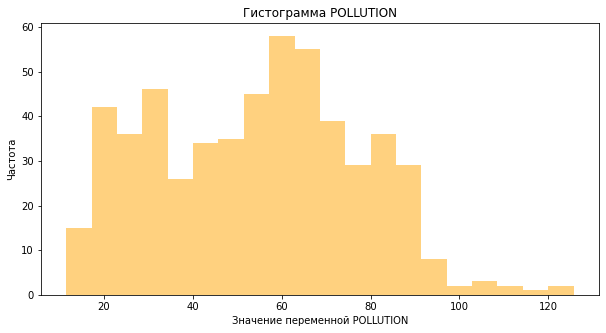

In [961]:
plt.figure(figsize = (10,5))

plt.hist(X_train_processed['POLLUTION'], bins=20, color='orange', alpha=0.5)
plt.xlabel('Значение переменной POLLUTION')
plt.ylabel('Частота')
plt.title('Гистограмма POLLUTION');

Гистограмма смутно напоминает нормальное распределение с выбросами в левом хвосте

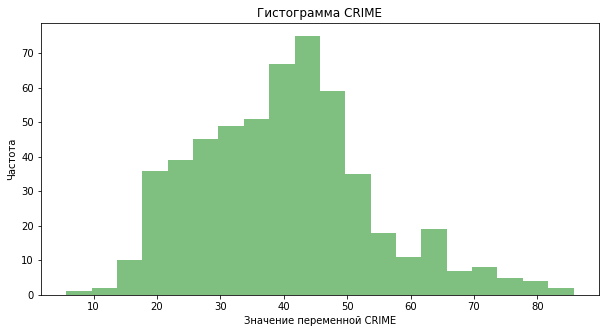

In [962]:
plt.figure(figsize = (10,5))

plt.hist(X_train_processed['CRIME'], bins=20, color='green', alpha=0.5)
plt.xlabel('Значение переменной CRIME')
plt.ylabel('Частота')
plt.title('Гистограмма CRIME');

Гистограмма смутно напоминает нормальное распределение с выбросами в левом хвосте

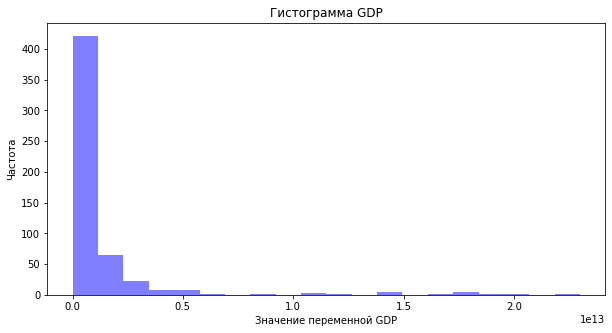

In [963]:
plt.figure(figsize = (10,5))

plt.hist(X_train_processed['GDP'], bins=20, color='blue', alpha=0.5)
plt.xlabel('Значение переменной GDP')
plt.ylabel('Частота')
plt.title('Гистограмма GDP');

Похоже на экспоненциальное распределение

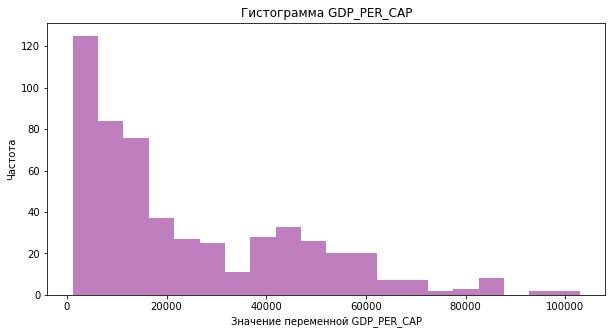

In [964]:
plt.figure(figsize = (10,5))

plt.hist(X_train_processed['GDP_PER_CAP'], bins=20, color='purple', alpha=0.5)
plt.xlabel('Значение переменной GDP_PER_CAP')
plt.ylabel('Частота')
plt.title('Гистограмма GDP_PER_CAP');

Также напоминает экспоненциальное распределение, но уже намного меньше

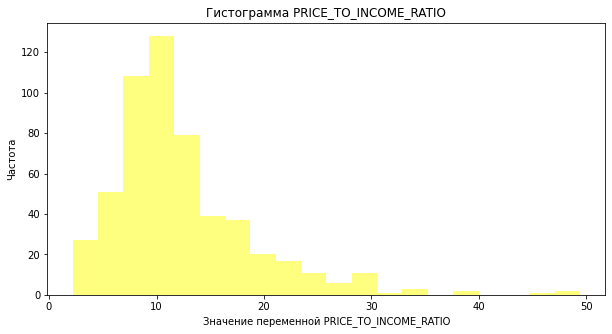

In [965]:
plt.figure(figsize = (10,5))

plt.hist(X_train_processed['PRICE_TO_INCOME_RATIO'], bins=20, color='yellow', alpha=0.5)
plt.xlabel('Значение переменной PRICE_TO_INCOME_RATIO')
plt.ylabel('Частота')
plt.title('Гистограмма PRICE_TO_INCOME_RATIO');

Если убрать выбросы в правом конце хвоста распределения, напоминает нормальное распределение

Теперь построим диаграммы рассеивания, что определить, есть ли корреляция между целевой переменной и предикторами:

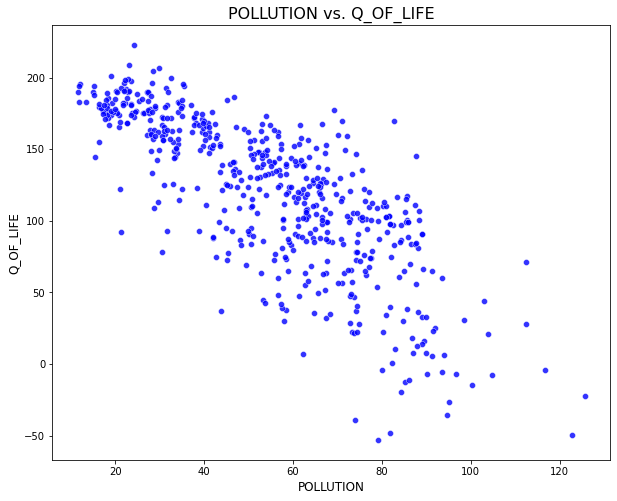

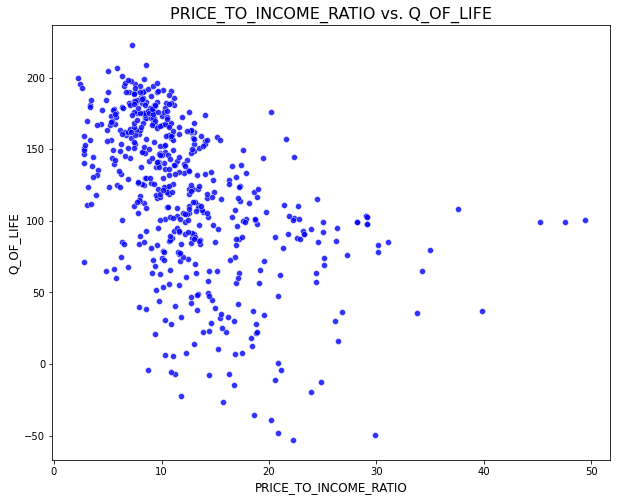

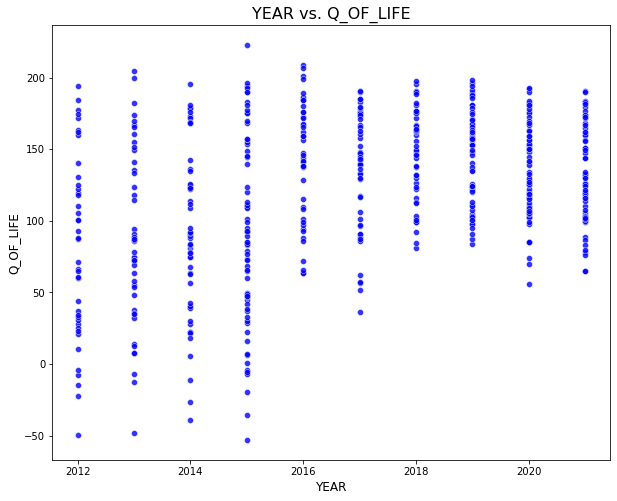

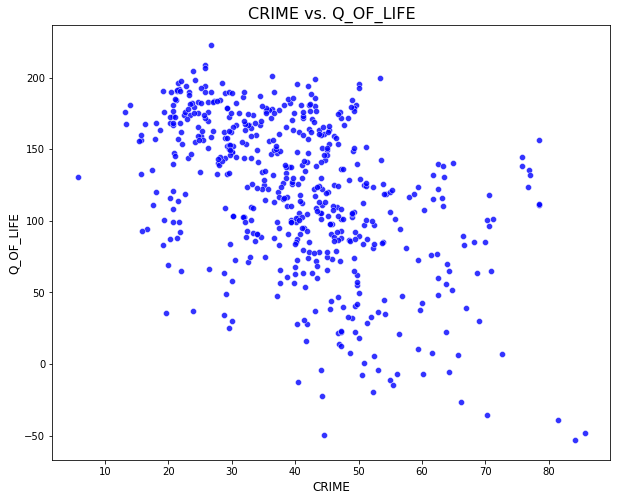

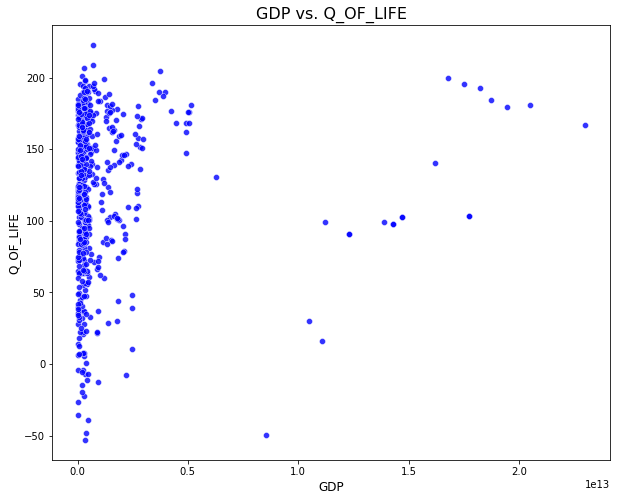

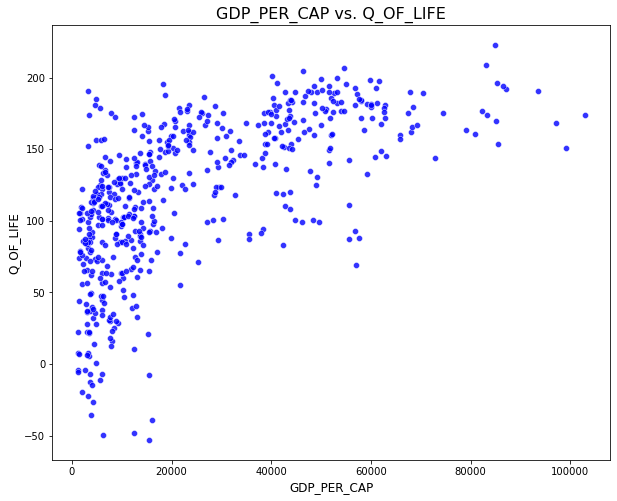

In [966]:
for col in numeric_cols:
    plt.figure(figsize=(10, 8))
    sns.scatterplot(data=X_train_processed, x=col, y=y_train, alpha=0.8, color='blue')
    plt.xlabel(col, fontsize=12)
    plt.title(f"{col} vs. Q_OF_LIFE", fontsize=16)
    plt.ylabel("Q_OF_LIFE", fontsize=12)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    plt.show()

Между POLUTTION,CRIME и Q_OF_LIFE явно присутствует прямая обратная взаимосвязь. PRICE_TO_INCOME и GDP_PER_CAP с целевой переменной будто бы распределены относительно друг друга логарифмически. А GDP и Q_OF_LIFE соотносятся очень странно. Попробуем преобразовать три эти диаграммы:

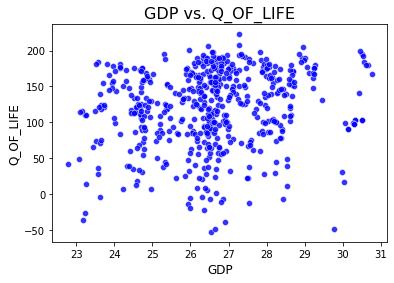

In [967]:
col = 'GDP'
sns.scatterplot(data=X_train_processed, x=np.log(X_train_processed[col]), y=y_train, alpha=0.8, color='blue')
plt.xlabel(col, fontsize=12)
plt.title(f"{col} vs. Q_OF_LIFE", fontsize=16)
plt.ylabel("Q_OF_LIFE", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

Судя по этому графику между GDP и Q_OF_LIFE нет ни положительной, ни отрицательной взаимосвязи. 

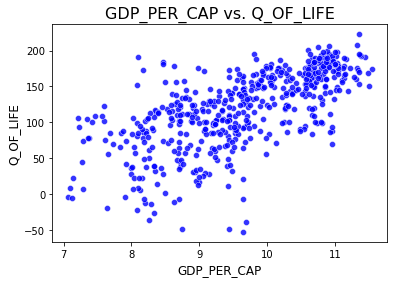

In [968]:
col = 'GDP_PER_CAP'
sns.scatterplot(data=X_train_processed, x=np.log(X_train_processed[col]), y=y_train, alpha=0.8, color='blue')
plt.xlabel(col, fontsize=12)
plt.title(f"{col} vs. Q_OF_LIFE", fontsize=16)
plt.ylabel("Q_OF_LIFE", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

Тут явно прослеживается прямая взаимосвязь. Логарифмизация переменной пошла на пользу

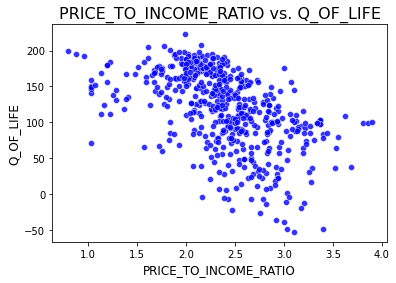

In [969]:
col = 'PRICE_TO_INCOME_RATIO'
sns.scatterplot(data=X_train_processed, x=np.log(X_train_processed[col]), y=y_train, alpha=0.8, color='blue')
plt.xlabel(col, fontsize=12)
plt.title(f"{col} vs. Q_OF_LIFE", fontsize=16)
plt.ylabel("Q_OF_LIFE", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

Этот график также стал выглядеть лучше, видна обратная взаимосвязь.

# Часть 4. Новые признаки

На основании прошлого пункта-визуализации можно попробовать добавить к обучающей и тестовой выборке новые столбцы: логарифм от GDP_PER_CAP и PRICE_TO_INCOME_RATIO, это должно сделать будущую модель более точной.

In [970]:
X_train_processed['log_CAP'] = np.log(X_train_processed['GDP_PER_CAP'])
X_test_processed['log_CAP'] = np.log(X_test_processed['GDP_PER_CAP'])
X_train_processed['log_RATIO'] = np.log(X_train_processed['PRICE_TO_INCOME_RATIO'])
X_test_processed['log_RATIO'] = np.log(X_test_processed['PRICE_TO_INCOME_RATIO'])
X_train_processed.head()

,POLLUTION,PRICE_TO_INCOME_RATIO,YEAR,CRIME,GDP,GDP_PER_CAP,TAX,Regional indicator,COUNTRY,log_CAP,log_RATIO
430,30.5,10.0,2018.0,34.5,2.423130e+11,23563.000000,proportional,Western Europe,Portugal,10.067433,2.302585
249,53.2,14.7,2015.0,54.0,9.929038e+10,6124.490887,progressive,Latin America and Caribbean,Ecuador,8.720051,2.687847
220,65.2,3.1,2015.0,78.4,3.467098e+11,6259.839681,progressive,Sub-Saharan Africa,South Africa,8.741910,1.131402
18,51.9,7.8,2012.0,40.6,2.162366e+11,20564.889862,progressive,Western Europe,Portugal,9.931341,2.054124
244,65.7,14.3,2015.0,50.0,8.060408e+10,3843.780672,progressive,South Asia,Sri Lanka,8.254212,2.660260


Нам известны названия стран, по которым мы собирали информацию. Страны подразделяются на развитые и развивающиеся. Добавим в датафреймы столбец, который будет показывать к какому типу страны относится наблюдение:

In [971]:
developed = ['Australia', 'Austria', 'Belgium', 'Canada', 'Cyprus', 'Czech Republic', 'Denmark', 'Estonia', 'Finland', 'France', 'Germany', 'Greece', 'Hong Kong', 'Hungary', 'Iceland', 'Ireland', 'Israel', 'Italy', 'Japan', 'Latvia', 'Lithuania', 'Luxembourg', 'Malta', 'Netherlands', 'New Zealand', 'Norway', 'Poland', 'Portugal', 'Singapore', 'Slovakia', 'Slovenia','UAE','Slovak Republic', 'South Korea', 'Spain', 'Sweden', 'Switzerland', 'Taiwan', 'United Arab Emirates', 'United Kingdom', 'United States']

In [972]:
X_train_processed['Type'] = X_train_processed['COUNTRY'].apply(lambda x: 'developed' if x in developed else 'developing')
X_test_processed['Type'] = X_test_processed['COUNTRY'].apply(lambda x: 'developed' if x in developed else 'developing')
X_train_processed.head()

,POLLUTION,PRICE_TO_INCOME_RATIO,YEAR,CRIME,GDP,GDP_PER_CAP,TAX,Regional indicator,COUNTRY,log_CAP,log_RATIO,Type
430,30.5,10.0,2018.0,34.5,2.423130e+11,23563.000000,proportional,Western Europe,Portugal,10.067433,2.302585,developed
249,53.2,14.7,2015.0,54.0,9.929038e+10,6124.490887,progressive,Latin America and Caribbean,Ecuador,8.720051,2.687847,developing
220,65.2,3.1,2015.0,78.4,3.467098e+11,6259.839681,progressive,Sub-Saharan Africa,South Africa,8.741910,1.131402,developing
18,51.9,7.8,2012.0,40.6,2.162366e+11,20564.889862,progressive,Western Europe,Portugal,9.931341,2.054124,developed
244,65.7,14.3,2015.0,50.0,8.060408e+10,3843.780672,progressive,South Asia,Sri Lanka,8.254212,2.660260,developing


Также добавим признак Regime, который будет характеризовать политический режим в стране:

In [973]:
not_demokrat =['China', 'North Korea', 'Cuba', 'Vietnam', 'Laos', 'Iran', 'Saudi Arabia', 'Syria', 'Belarus', 'Russia', 'Kazakhstan', 'Uzbekistan', 'Turkmenistan', 'Tajikistan', 'Eritrea', 'Sudan', 'Zimbabwe', 'Venezuela', 'Ethiopia', 'Nicaragua', 'Chad', 'Bahrain', 'Oman', 'United Arab Emirates', 'UAE', 'Qatar', 'Egypt']

In [974]:
X_train_processed['Regime'] = X_train_processed['COUNTRY'].apply(lambda x: 'no democracy' if x in not_demokrat else 'democracy')
X_test_processed['Regime'] = X_test_processed['COUNTRY'].apply(lambda x: 'no democracy' if x in not_demokrat else 'democracy')
X_train_processed.head()

,POLLUTION,PRICE_TO_INCOME_RATIO,YEAR,CRIME,GDP,GDP_PER_CAP,TAX,Regional indicator,COUNTRY,log_CAP,log_RATIO,Type,Regime
430,30.5,10.0,2018.0,34.5,2.423130e+11,23563.000000,proportional,Western Europe,Portugal,10.067433,2.302585,developed,democracy
249,53.2,14.7,2015.0,54.0,9.929038e+10,6124.490887,progressive,Latin America and Caribbean,Ecuador,8.720051,2.687847,developing,democracy
220,65.2,3.1,2015.0,78.4,3.467098e+11,6259.839681,progressive,Sub-Saharan Africa,South Africa,8.741910,1.131402,developing,democracy
18,51.9,7.8,2012.0,40.6,2.162366e+11,20564.889862,progressive,Western Europe,Portugal,9.931341,2.054124,developed,democracy
244,65.7,14.3,2015.0,50.0,8.060408e+10,3843.780672,progressive,South Asia,Sri Lanka,8.254212,2.660260,developing,democracy


Названия стран, год и их региональный индикатор был необходим только для блоков Сбор Данных, Визуализация и Новые признаки. В дальнейшем они будут бесполезны, поэтому просто уберу их:

In [975]:
X_train_processed.drop(['COUNTRY','Regional indicator', 'YEAR'], axis = 1, inplace = True)
X_test_processed.drop(['COUNTRY','Regional indicator','YEAR'], axis = 1, inplace = True)
X_train_processed.head()

,POLLUTION,PRICE_TO_INCOME_RATIO,CRIME,GDP,GDP_PER_CAP,TAX,log_CAP,log_RATIO,Type,Regime
430,30.5,10.0,34.5,2.423130e+11,23563.000000,proportional,10.067433,2.302585,developed,democracy
249,53.2,14.7,54.0,9.929038e+10,6124.490887,progressive,8.720051,2.687847,developing,democracy
220,65.2,3.1,78.4,3.467098e+11,6259.839681,progressive,8.741910,1.131402,developing,democracy
18,51.9,7.8,40.6,2.162366e+11,20564.889862,progressive,9.931341,2.054124,developed,democracy
244,65.7,14.3,50.0,8.060408e+10,3843.780672,progressive,8.254212,2.660260,developing,democracy


# Гипотезы

Проверим гипотезы о:
1) https://www.codecamp.ru/blog/t-test-linear-regression/
 влиянии признаков на таргет
 + ANOVA
2) гипотеза о нормальности распределения ответов и предикторов

(array([ 3.,  1.,  1.,  1.,  2.,  2.,  5.,  3.,  5.,  3.,  7.,  5., 10.,
         9.,  8.,  7., 10., 12., 15., 14., 28., 18., 36., 22., 21., 30.,
        17., 22., 23., 28., 27., 28., 30., 37., 20., 21.,  8.,  3.,  0.,
         1.]),
 array([-53.    , -46.1025, -39.205 , -32.3075, -25.41  , -18.5125,
        -11.615 ,  -4.7175,   2.18  ,   9.0775,  15.975 ,  22.8725,
         29.77  ,  36.6675,  43.565 ,  50.4625,  57.36  ,  64.2575,
         71.155 ,  78.0525,  84.95  ,  91.8475,  98.745 , 105.6425,
        112.54  , 119.4375, 126.335 , 133.2325, 140.13  , 147.0275,
        153.925 , 160.8225, 167.72  , 174.6175, 181.515 , 188.4125,
        195.31  , 202.2075, 209.105 , 216.0025, 222.9   ]),
 <BarContainer object of 40 artists>)

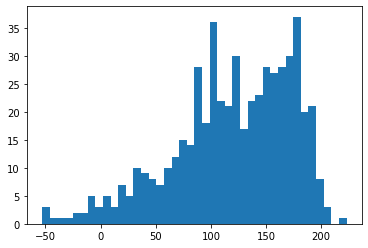

In [798]:
plt.hist((y_train)**1, bins = 40)

# Машинка

Сначала посмотрим на кетбуст. Для него encoding не нужен (он только мешает).

In [976]:
cat = [i for i in X_train_processed if X_train_processed[i].dtype == 'object']
cat

['TAX', 'Type', 'Regime']

In [977]:
import numpy as np
import pandas as pd
from sklearn.model_selection import RandomizedSearchCV, KFold
import catboost as cb



param_dist = {
    'learning_rate': [0.01, 0.03, 0.05, 0.1],
    'depth': [3, 4, 5, 6, 7, 8, 9, 10],
    'l2_leaf_reg': np.logspace(-3, 1, 10),
    'subsample': [0.6, 0.7, 0.8, 0.9, 1],
}


model = cb.CatBoostRegressor(random_seed=42, verbose=False, cat_features= cat)
random_search = RandomizedSearchCV(model,param_distributions=param_dist, n_iter=50, cv=KFold(3), random_state=42, n_jobs=-1)


random_search.fit(X_train_processed, y_train)


print(f"Best hyperparameters: {random_search.best_params_}")


y_pred = random_search.predict(X_test_processed)
accuracy = random_search.score(X_test_processed, y_test)


print(f"Accuracy on test set: {accuracy:.4f}")


Best hyperparameters: {'subsample': 1, 'learning_rate': 0.01, 'l2_leaf_reg': 0.1668100537200059, 'depth': 7}
Accuracy on test set: 0.7752


Нормируем данные и сравним результаты моделей.

In [ ]:
# scaler
#scaler = StandardScaler()
#X_train[numeric_cols] = scaler.fit_transform(X_train[numeric_cols])
#X_test[numeric_cols] = scaler.transform(X_test[numeric_cols])

In [ ]:
# catboost

Оставим только логарифмированные значения PRICE_TO_INCOME_RATIO и GDP_PER_CAP и повторим:

In [ ]:
# catboost

А теперь используем регрессию. Перед этим проведём encoding.

In [ ]:
#encoding
# One-hot encode categorical features
#categorical_cols = X_train.select_dtypes(include=['object']).columns.tolist()
#X_train_cat = pd.get_dummies(X_train[categorical_cols], drop_first=True)
#X_test_cat = pd.get_dummies(X_test[categorical_cols], drop_first=True)

In [ ]:
#linear regr